In [21]:
import pyedflib
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import butter, filtfilt

In [4]:
files = glob.glob('./edf/*.edf')

In [11]:
files[0]

'./edf/SC4081E0-PSG.edf'

In [13]:
with pyedflib.EdfReader(files[0]) as edf:
    # Get the number of signals (e.g., EEG, ECG) in the file
    n = edf.signals_in_file

    # Get signal labels
    signal_labels = edf.getSignalLabels()

    # Read each signal
    for i in range(n):
        # Read data for the ith signal
        signal = edf.readSignal(i)
        # Process the signal as needed
    
    eeg = edf.readSignal(0)

In [35]:
fs = 100

eeg_segment = eeg[:fs * 30]

In [47]:
# Design low-pass filter with a 30Hz cutoff frequency
cutoff = 30  # Cutoff frequency in Hz
nyquist = 0.5 * fs  # Nyquist frequency
normal_cutoff = cutoff / nyquist  # Normalize cutoff frequency
b, a = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)  # Filter design
# Apply the filter
filtered_signal = filtfilt(b, a, eeg_segment)

In [48]:
# Compute the Short-Time Fourier Transform (STFT)
frequencies, times, Zxx = stft(filtered_signal, 100)

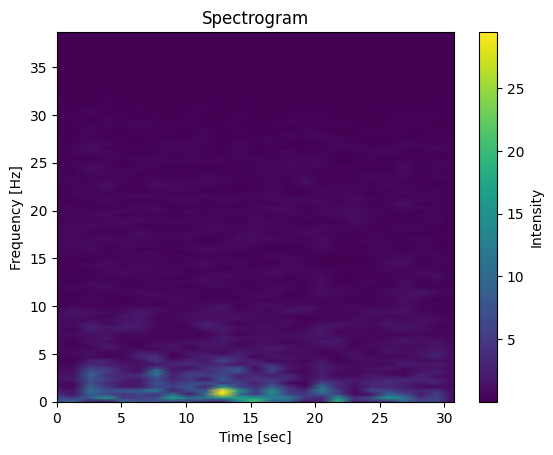

In [49]:
# Plot the Spectrogram
plt.pcolormesh(times[:100], frequencies[:100], np.abs(Zxx)[:100], shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity')
plt.show()

In [50]:
eeg

array([-15.81758242, -10.80879121,  -3.05934066, ..., -10.14725275,
        -8.25714286, -11.94285714])

In [52]:
np.save("./eeg.npy", eeg)

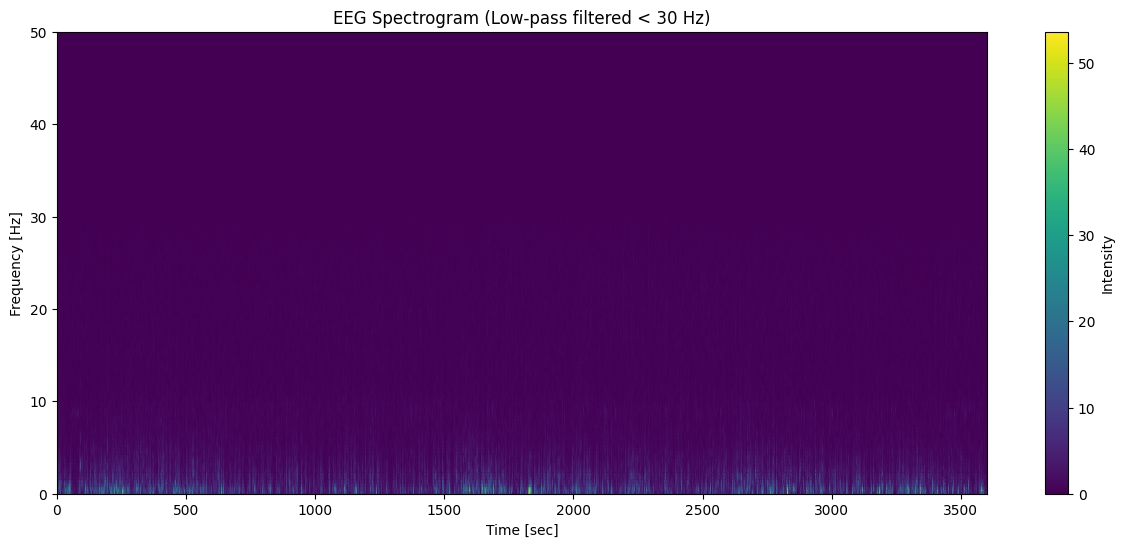

In [53]:
import numpy as np
from scipy.signal import butter, filtfilt, stft
import matplotlib.pyplot as plt

# Load the EEG data from the .npy file
eeg_data_path = './eeg.npy'
eeg_data = np.load(eeg_data_path)

# Sampling information
fs = 100  # Sampling frequency in Hz
cutoff = 30  # Cutoff frequency for low-pass filter

# Design the low-pass filter
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist
b, a = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)

# Apply the low-pass filter
filtered_eeg_data = filtfilt(b, a, eeg_data)

# Generate the spectrogram for the first 3600 seconds
# Define the time window for the first 3600 seconds, considering the sampling frequency
time_limit = 3600 * fs  # 3600 seconds in samples
frequencies, times, Zxx = stft(filtered_eeg_data[:time_limit], fs, nperseg=256, noverlap=128)

# Plot the Spectrogram
plt.figure(figsize=(15, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('EEG Spectrogram (Low-pass filtered < 30 Hz)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity')
plt.show()
